In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors


In [2]:
df = pd.read_csv('Crime_Data_from_2020_to_Present.csv')
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468


In [3]:
df.shape

(788767, 28)

##### Reducing datapoints

In [4]:
df = df.drop(df.index[1401:])
df

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1396,200504818,01/19/2020 12:00:00 AM,01/19/2020 12:00:00 AM,300,5,Harbor,563,2,626,INTIMATE PARTNER - SIMPLE ASSAULT,...,AO,Adult Other,626.0,NaN,NaN,NaN,900 W 9TH ST,NaN,33.7361,-118.2968
1397,200617010,10/22/2020 12:00:00 AM,10/01/2020 12:00:00 AM,1400,6,Hollywood,647,2,668,"EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)",...,IC,Invest Cont,668.0,NaN,NaN,NaN,1600 N GOWER ST,NaN,34.0998,-118.3223
1398,201013217,09/18/2020 12:00:00 AM,09/12/2020 12:00:00 AM,1,10,West Valley,1017,1,820,ORAL COPULATION,...,IC,Invest Cont,820.0,NaN,NaN,NaN,17100 COVELLO ST,NaN,34.2075,-118.5068
1399,200118253,09/20/2020 12:00:00 AM,09/16/2020 12:00:00 AM,1700,1,Central,135,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),...,IC,Invest Cont,420.0,NaN,NaN,NaN,200 S MAIN ST,NaN,34.0506,-118.2449


In [5]:
df.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON'],
      dtype='object')

In [6]:
len(df['AREA'].unique())

21

In [7]:
len(df['AREA NAME'].unique())

21

In [8]:
df1 = df.drop(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street'], axis = 1)
df1.head()

,AREA,AREA NAME,LAT,LON
0,3,Southwest,34.0141,-118.2978
1,1,Central,34.0459,-118.2545
2,1,Central,34.0448,-118.2474
3,15,N Hollywood,34.1685,-118.4019
4,19,Mission,34.2198,-118.4468


In [9]:
df1.shape

(1401, 4)

In [10]:
input_df = df1.drop(['AREA', 'AREA NAME'], axis = 1)
input_df

,LAT,LON
0,34.0141,-118.2978
1,34.0459,-118.2545
2,34.0448,-118.2474
3,34.1685,-118.4019
4,34.2198,-118.4468
...,...,...
1396,33.7361,-118.2968
1397,34.0998,-118.3223
1398,34.2075,-118.5068
1399,34.0506,-118.2449


### Visualising the input data

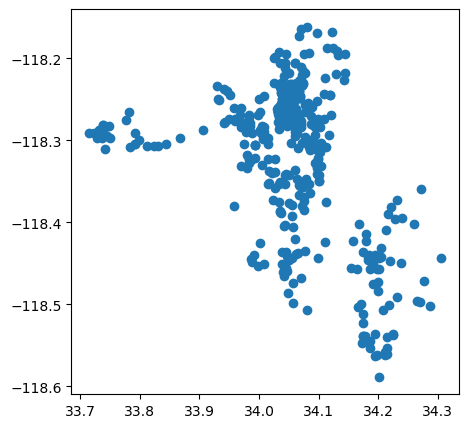

In [11]:
plt.figure(figsize=(5,5))
plt.scatter(input_df['LAT'],input_df['LON'])
plt.show()

In [12]:
len(df['LAT'].unique())

465

In [13]:
len(df['LON'].unique())

525

In [14]:
#Standardize features
scaler = StandardScaler()
features_std = scaler.fit_transform(input_df)

In [15]:
features_std

array([[-0.60722755, -0.44734281],
       [-0.04944358,  0.27276384],
       [-0.06873799,  0.39084137],
       ...,
       [ 2.78508126, -3.92314623],
       [ 0.03299619,  0.43241797],
       [ 0.05053657,  0.24615482]])

#### Dataframe for scaled input

In [16]:
dataframe = pd.DataFrame(features_std, columns=['Column1 (LAT)', 'Column2 (LON)'])
dataframe

,Column1 (LAT),Column2 (LON)
0,-0.607228,-0.447343
1,-0.049444,0.272764
2,-0.068738,0.390841
3,2.101007,-2.178592
4,3.000828,-2.925308
...,...,...
1396,-5.483452,-0.430712
1397,0.895983,-0.854793
1398,2.785081,-3.923146
1399,0.032996,0.432418


### Clustering using K-means

In [17]:
from sklearn.cluster import KMeans

# Specify the number of clusters
num_clusters = 5

# Initialize the KMeans model
kmeans = KMeans(n_clusters=num_clusters)

# Fit the model to the data
kmeans.fit(dataframe)

# Get the cluster labels for each data point
cluster_labels = kmeans.labels_

C:\Users\win\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [18]:
cluster_labels

array([0, 4, 4, ..., 2, 4, 4])

###### Evaluating K-means cluster model using silhouette score

In [19]:
# Evaluate model
silhouette_score(dataframe, cluster_labels)

0.7184554952971974

### Visualising K-means Cluster

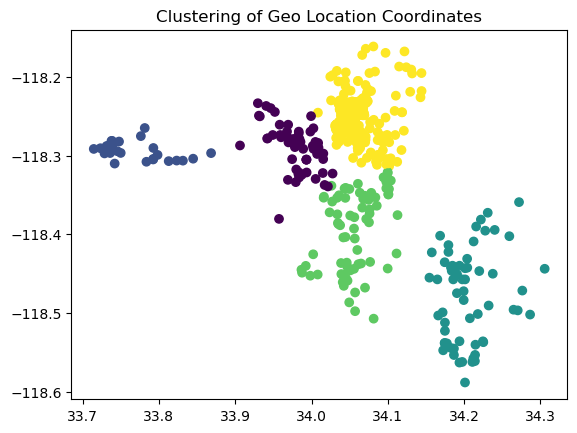

In [20]:
# Plot the data points with their cluster labels
plt.scatter(input_df['LAT'],input_df['LON'], c=cluster_labels)
# plt.xlabel('LAT')
# plt.ylabel('LON')
plt.title('Clustering of Geo Location Coordinates')
plt.show()

#### ELBOW plot

In [21]:
sse= []

k_range = range(1,10)
for k in k_range:
    km = KMeans(n_clusters=k, n_init= 50)
    km.fit(input_df)
    sse.append(km.inertia_)
sse

[9.619133360214152,
 4.646969743970639,
 2.3577226879661586,
 1.4877148457945422,
 1.1681284174060342,
 0.9589756896873453,
 0.8025887183791558,
 0.6603718571292951,
 0.5756630161426344]

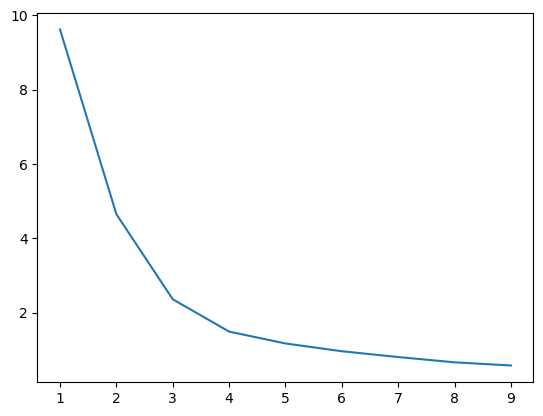

In [22]:
# plt.xlabel('k')
# plt.ylabel('sse')
plt.plot(k_range, sse)

Optimal value for seems to be 3.

### Clustering using DBSCAN

In [23]:
from sklearn.cluster import DBSCAN
cluster = DBSCAN(eps=0.2, min_samples=6, metric='euclidean')

In [24]:
model = cluster.fit(dataframe)

In [25]:
# Show cluster membership
model_labels= model.labels_
model_labels

array([ 7,  0,  0, ..., -1,  0,  0], dtype=int64)

###### Evaluating KMeans cluster model using silhouette score

In [26]:
# Evaluate model
silhouette_score(dataframe, model_labels)

0.5131002451594094

### Visualising DBSCAN Clusters

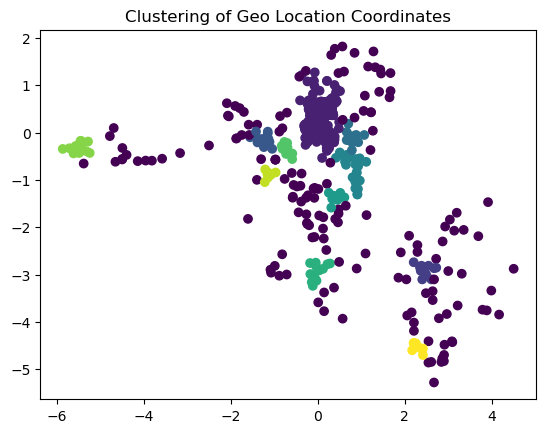

In [27]:
# Plot the data points with their cluster labels
plt.scatter(dataframe['Column1 (LAT)'],dataframe['Column2 (LON)'], c=model_labels)
# plt.xlabel("Column1 (LAT)")
# plt.ylabel('Column2 (LON)')
plt.title('Clustering of Geo Location Coordinates')
plt.show()

#### Finding Optimal parameter for DBSCAN

In [28]:
epsilon = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8]
min_samples = [3,5,6,7,10,15]


sil_avg = []
max_value = [0,0,0,0]

for i in range(len(epsilon)):
    for j in range(len(min_samples)):

        db = DBSCAN(min_samples = min_samples[j], eps =epsilon[i]).fit(features_std)
        #cluster_labels=dbscan.fit_predict(data) 
        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        labels = db.labels_

        # Number of clusters in labels, ignoring noise if present.
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise_ = list(labels).count(-1)

        silhouette_avg = silhouette_score(features_std, labels)
        if silhouette_avg > max_value[3]:
            max_value=(epsilon[i], min_samples[j], n_clusters_, silhouette_avg)
        sil_avg.append(silhouette_avg)



In [29]:
print("epsilon=", max_value[0], 
      "\nmin_sample=", max_value[1],
      "\nnumber of clusters=", max_value[2],
      "\naverage silhouette score= %.4f" % max_value[3])

epsilon= 0.8 
min_sample= 7 
number of clusters= 3 
average silhouette score= 0.8165


### Plotting sorted k-dist graph

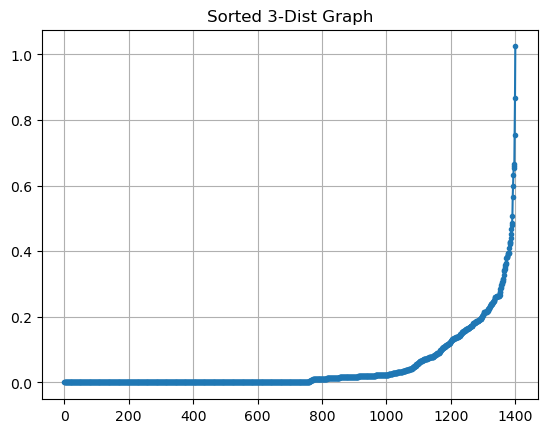

In [30]:
# Specifying the value of k (number of neighbors)
k = 3

# Calculating the k-distance plot
nn = NearestNeighbors(n_neighbors=k)
nn.fit(features_std)
distances, _ = nn.kneighbors(features_std)
k_distances = distances[:, -1]  # Take the distance to the kth neighbor

# Sort the k-distance values
sorted_distances = np.sort(k_distances)

# Create the Sorted k-Dist Graph
plt.plot(sorted_distances, marker='.')
# plt.xlabel("Data Points (sorted)")
# plt.ylabel(f"{k}-Distance")
plt.title(f"Sorted {k}-Dist Graph")
plt.grid(True)
plt.show()


## Silhouette score of K-means and DBSCAN at Optimum parameter value

### K-means

In [31]:
kmeans_opt = KMeans(n_clusters=3)
kmeans_opt.fit(dataframe)
cluster_labels_opt = kmeans_opt.labels_
silhouette_score(dataframe, cluster_labels_opt)

C:\Users\win\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.8276091580639828

### DBSCAN

In [32]:
cluster_opt = DBSCAN(eps=0.8, min_samples=7, metric='euclidean')
model_opt = cluster_opt.fit(dataframe)
model_labels_opt= model_opt.labels_
silhouette_score(dataframe, model_labels_opt)

0.8165456825608844